## Lab 5 - PID control
Run this cell before running any other cells

In [28]:
%reload_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

ble = get_ble_controller()
ble.connect()

2024-10-30 15:45:48,652 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:ec:f2:c2:23:04
2024-10-30 15:45:51,780 | INFO     |: Connected to c0:ec:f2:c2:23:04


In [29]:
# Notification Handler
def notification_handler(uuid, byte_array):
    global time_list, dist, pid, pwm, p, i, d
    rx_string = ble.bytearray_to_string(byte_array)
#    print(rx_string)
    if rx_string.find(',') < 0:
        print(rx_string[2:])
    else:
        time, a, b, c, kp, ki, kd = rx_string.split(',')
        time_sec = float(time[2:])/1000
        time_list.append(time_sec)
        dist.append(float(a[3:]))
        pid.append(float(b[3:]))
        pwm.append(float(c[3:]))
        p.append(float(kp[3:]))
        i.append(float(ki[3:]))
        d.append(float(kd[3:]))
        
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [30]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

21600


In [4]:
ble.send_command(CMD.SET_PID_MAX, "0.15|0.001|0.0|50|40")

:0.150 KI:0.1 KD:0.0 PID_MAX:50 DEADZONE:40


In [31]:
ble.send_command(CMD.GO_WALL, "")

In [32]:
# Clear the data
time_list = []
dist = []
pid = []
pwm = []
p = []
i = []
d = []

# send the command
ble.send_command(CMD.GET_WALL_DATA, "")

1110


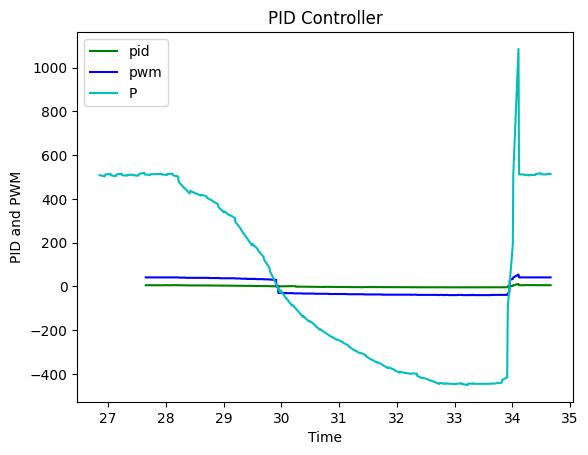

2024-10-30 15:49:11,796 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E


In [40]:
#plt.yticks([-180, -120, -60, 0, 60, 120, 180])
count = len(time_list)
print(count)
    
#for i in range(0, 30):
#    print(time_list[i], dist[i], pid[i], pwm[i])

total = count - 1

#plt.plot(time_list[:total], dist[:total], color='r', label='dist')
plt.plot(time_list[100:total],  pid[100:total], color='g', label='pid')
plt.plot(time_list[100:total],  pwm[100:total], color='b', label='pwm')
plt.plot(time_list[:total],  p[:total],   color='c', label='P')
#plt.plot(time_list[:total],  i[:total],  color='m', label='I')
#plt.plot(time_list[:total],  d[:total],  color='y', label='D')

plt.title('PID Controller')
plt.xlabel('Time')
plt.ylabel('PID and PWM')
plt.legend()
plt.show()

In [529]:
# Forward 1 seconds. max speed, then brake hard
ble.send_command(CMD.SET_PWM, "100|0|100|0|1000")
ble.send_command(CMD.SET_PWM, "255|255|255|255|1000")

2024-10-22 07:52:46,186 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E


In [253]:
# Left motor only
ble.send_command(CMD.SET_PWM, "0|0|50|0|2000")

In [254]:
# Right motor only
ble.send_command(CMD.SET_PWM, "50|0|0|0|2000")

In [ ]:
# rotate CCW
ble.send_command(CMD.SET_PWM, "1|250|250|1|2000")

In [294]:
# rotate CW
ble.send_command(CMD.SET_PWM, "250|1|1|250|2000")

In [259]:
# Forward 2 seconds
ble.send_command(CMD.SET_PWM, "80|0|80|0|2000")

2024-10-20 16:32:00,536 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E


In [826]:
# Backward 2 seconds
ble.send_command(CMD.SET_PWM, "0|75|0|75|2000")

In [295]:
# stop
ble.send_command(CMD.SET_PWM, "0|0|0|0|2000")

In [302]:
# slowest forward
ble.send_command(CMD.SET_PWM, "40|00|40|00|2000")

In [504]:
# slowest reverse
ble.send_command(CMD.SET_PWM, "00|80|00|80|2000")

In [327]:
# slowest turn
ble.send_command(CMD.SET_PWM, "00|180|180|0|5000")

## Disconnect

In [6]:
# Disconnect
ble.disconnect()

2024-08-02 13:25:58,083 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E
